In [ ]:
# 查看数据类型
import sdf_helper as sh
import numpy as np
import matplotlib.pyplot as plt
import os

# 设定数据路径
base_path = '/media/lan/4248e56e-6d9a-4026-afad-e8b1d59ceab0/epoch-set2/epoch2d/激光电子对撞/激光0.5GeV+bx0'
file_prefix = 'field'
file_suffix = '.sdf'
file_index = 3
file_name = f"{file_prefix}{file_index:04d}{file_suffix}"
file_path = os.path.join(base_path, file_name)

# 读取数据
Field_Data = sh.getdata(file_path)
sh.list_variables(Field_Data)

Reading file /media/lan/4248e56e-6d9a-4026-afad-e8b1d59ceab0/epoch-set2/epoch3d/1/field0010.sdf
t() = time
bx(1500, 100, 100) = bx
by(1500, 100, 100) = by
bz(1500, 100, 100) = bz
ex(1500, 100, 100) = ex
ey(1500, 100, 100) = ey
ez(1500, 100, 100) = ez
x(1501, 101, 101) = grid
y(1501, 101, 101) = grid
z(1501, 101, 101) = grid
xc(1500, 100, 100) = grid_mid
yc(1500, 100, 100) = grid_mid
zc(1500, 100, 100) = grid_mid
Absorption_Fraction_of_Laser_Energy_Absorbed____ <class 'sdf.BlockConstant'> [1]
Absorption_Total_Laser_Energy_Injected__J_ <class 'sdf.BlockConstant'> [1]
CPUs_Current_rank <class 'sdf.BlockPlainVariable'> [0, 0, 0]
CPUs_Original_rank <class 'sdf.BlockPlainVariable'> [ 3,  2, 25]
Electric_Field_Ex <class 'sdf.BlockPlainVariable'> [1500,  100,  100]
Electric_Field_Ex_averaged <class 'sdf.BlockPlainVariable'> [1500,  100,  100]
Electric_Field_Ey <class 'sdf.BlockPlainVariable'> [1500,  100,  100]
Electric_Field_Ey_averaged <class 'sdf.BlockPlainVariable'> [1500,  100,  100]
Elec

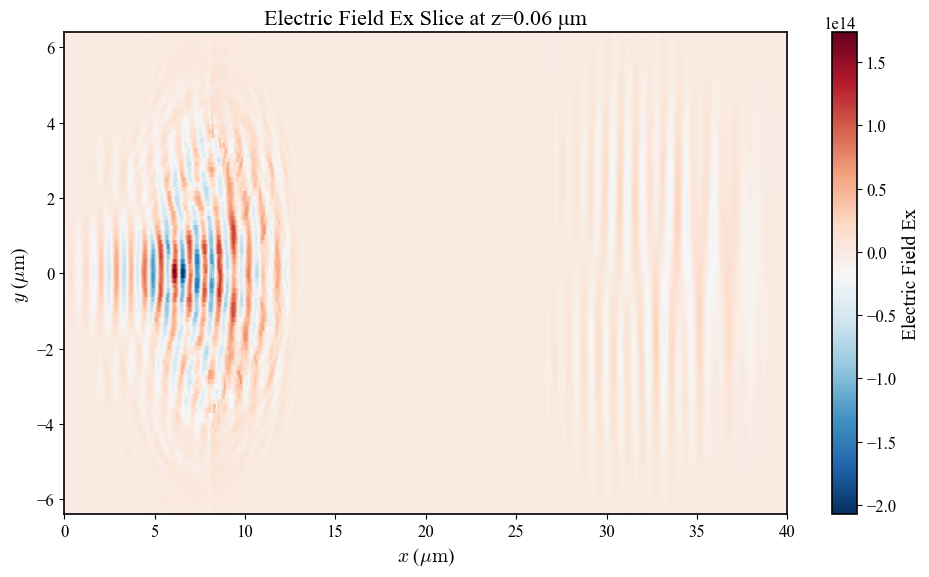

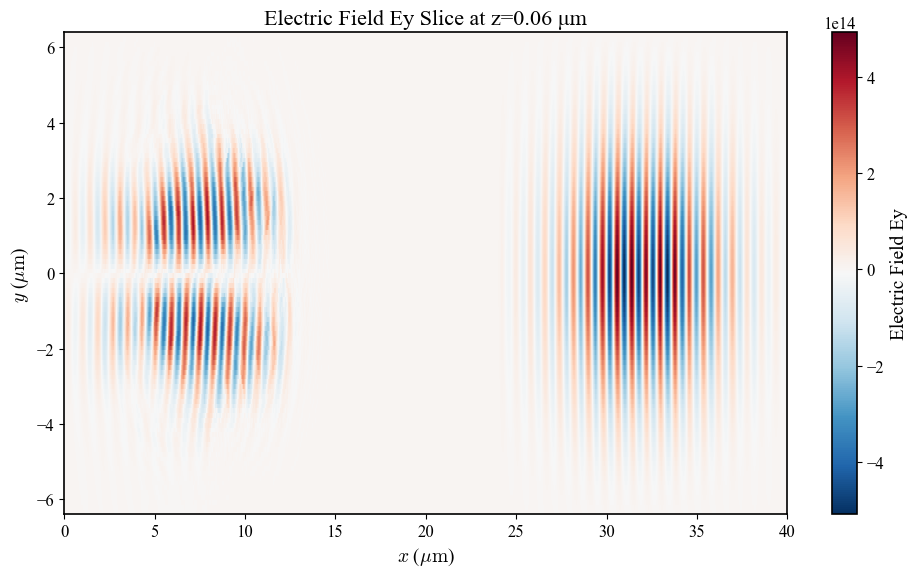

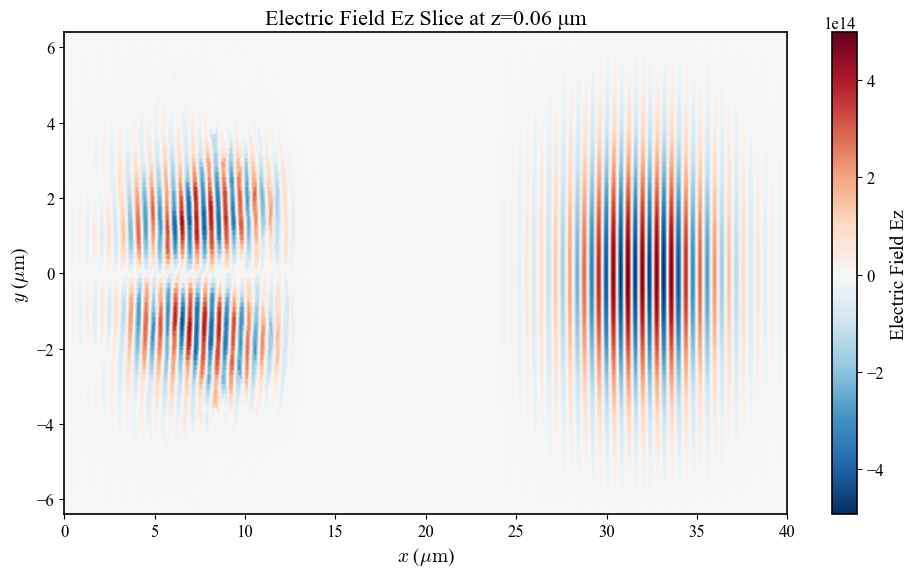

In [3]:
# 中轴线截面图，电场
import sdf_helper as sh
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib as mpl

# -------- 统一设置 matplotlib 风格 --------
def set_global_plot_style():
    """统一设置 matplotlib 绘图风格"""
    import matplotlib as mpl
    mpl.rcParams.update({
        'font.family': 'Times New Roman',
        'font.size': 14,
        'axes.labelsize': 14,
        'axes.titlesize': 16,
        'axes.linewidth': 1.2,
        'lines.linewidth': 1.5,
        'xtick.labelsize': 12,
        'ytick.labelsize': 12,
        'xtick.direction': 'out',
        'ytick.direction': 'out',
        'xtick.minor.size': 4,
        'ytick.minor.size': 4,
        'xtick.minor.width': 1,
        'ytick.minor.width': 1,
        'legend.fontsize': 12,
        'figure.titlesize': 16,
        'figure.dpi': 100,
        'savefig.dpi': 300,
        'savefig.bbox': 'tight',
        'mathtext.fontset': 'cm',
        'mathtext.rm': 'serif'
    })

# 应用统一风格
set_global_plot_style()

# -------- 数据路径和读取 --------
base_path = '/media/lan/4248e56e-6d9a-4026-afad-e8b1d59ceab0/epoch-set2/epoch3d/1'
file_prefix = 'field'
file_suffix = '.sdf'
file_index = 10
file_name = f"{file_prefix}{file_index:04d}{file_suffix}"
file_path = os.path.join(base_path, file_name)

# 读取数据
Field_Data = sh.getdata(file_path)
sh.list_variables(Field_Data)

# 电场数据
Ex = Field_Data.Electric_Field_Ex.data
Ey = Field_Data.Electric_Field_Ey.data
Ez = Field_Data.Electric_Field_Ez.data

# 坐标
grid = Field_Data.Grid_Grid_mid.data
dims = len(grid)
grid = [g / 1e-6 for g in grid]  # 转为微米单位

# -------- 绘图函数 --------
def plot_field(field, field_name):
    """根据维度绘制电磁场分布图"""
    if dims == 1:
        x = grid[0]
        plt.figure(figsize=(8, 5))
        plt.plot(x, field)
        ax.set_xlabel(r'$x$ ($\mathrm{\mu m}$)')
        plt.ylabel(field_name)
        plt.title(f'{field_name} Lineout')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    elif dims == 2:
        x, y = grid
        X, Y = np.meshgrid(x, y, indexing='ij')
        fig, ax = plt.subplots(figsize=(10, 6))
        c = ax.pcolormesh(X, Y, field, shading='auto',cmap='RdBu_r')
        cbar = plt.colorbar(c, ax=ax)
        cbar.set_label(field_name, fontsize=mpl.rcParams['axes.labelsize'])  # 保持一致
        ax.set_xlabel(r'$x$ ($\mathrm{\mu m}$)')
        ax.set_ylabel(r'$y$ ($\mathrm{\mu m}$)')
        ax.set_title(f'{field_name} Distribution (2D)')
        plt.tight_layout()
        plt.show()

    elif dims == 3:
        x, y, z = grid
        z_index = field.shape[2] // 2
        field_slice = field[:, :, z_index]
        X, Y = np.meshgrid(x, y, indexing='ij')
        fig, ax = plt.subplots(figsize=(10, 6))
        c = ax.pcolormesh(X, Y, field_slice, shading='auto', cmap='RdBu_r')
        cbar = plt.colorbar(c, ax=ax)
        cbar.set_label(field_name, fontsize=mpl.rcParams['axes.labelsize'])  # 保持一致
        ax.set_xlabel(r'$x$ ($\mathrm{\mu m}$)')
        ax.set_ylabel(r'$y$ ($\mathrm{\mu m}$)')
        ax.set_title(f'{field_name} Slice at z={z[z_index]:.2f} μm')
        plt.tight_layout()
        plt.show()

    else:
        raise ValueError("Unsupported dimensionality in SDF file.")

# -------- 绘图 --------
plot_field(Ex, 'Electric Field Ex')
plot_field(Ey, 'Electric Field Ey')
plot_field(Ez, 'Electric Field Ez')

In [2]:
# 读取电场文件

import sdf_helper as sh
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import os

# -------- 统一设置 matplotlib 风格 --------
def set_global_plot_style():
    """统一设置 matplotlib 绘图风格"""
    import matplotlib as mpl
    mpl.rcParams.update({
        'font.family': 'Times New Roman',
        'font.size': 14,
        'axes.labelsize': 14,
        'axes.titlesize': 16,
        'axes.linewidth': 1.2,
        'lines.linewidth': 1.5,
        'xtick.labelsize': 12,
        'ytick.labelsize': 12,
        'xtick.direction': 'out',
        'ytick.direction': 'out',
        'xtick.minor.size': 4,
        'ytick.minor.size': 4,
        'xtick.minor.width': 1,
        'ytick.minor.width': 1,
        'legend.fontsize': 12,
        'figure.titlesize': 16,
        'figure.dpi': 100,
        'savefig.dpi': 300,
        'savefig.bbox': 'tight',
        'mathtext.fontset': 'cm',
        'mathtext.rm': 'serif'
    })

# 应用统一风格
set_global_plot_style()

# -------- 设置文件路径 --------
base_path = '/media/lan/4248e56e-6d9a-4026-afad-e8b1d59ceab0/epoch-set2/epoch3d/ju2024ab+2'
file_prefix = 'field'
file_suffix = '.sdf'
file_index =18
file_name = f"{file_prefix}{file_index:04d}{file_suffix}"
file_path = os.path.join(base_path, file_name)

# -------- 读取数据 --------
Field_Data = sh.getdata(file_path)

# 获取对应电场数据
field_dict = {
    'Ex': Field_Data.Electric_Field_Ex.data,
    'Ey': Field_Data.Electric_Field_Ey.data,
    'Ez': Field_Data.Electric_Field_Ez.data
}

# 获取坐标轴并转为微米
grid = Field_Data.Grid_Grid_mid.data
x = grid[0] / 1e-6
y = grid[1] / 1e-6
z = grid[2] / 1e-6

Reading file /media/lan/4248e56e-6d9a-4026-afad-e8b1d59ceab0/epoch-set2/epoch3d/ju2024ab+2/field0018.sdf
t() = time
bx(1500, 1000, 1000) = bx
ex(1500, 1000, 1000) = ex
ey(1500, 1000, 1000) = ey
ez(1500, 1000, 1000) = ez
x(1501, 1001, 1001) = grid
y(1501, 1001, 1001) = grid
z(1501, 1001, 1001) = grid
xc(1500, 1000, 1000) = grid_mid
yc(1500, 1000, 1000) = grid_mid
zc(1500, 1000, 1000) = grid_mid


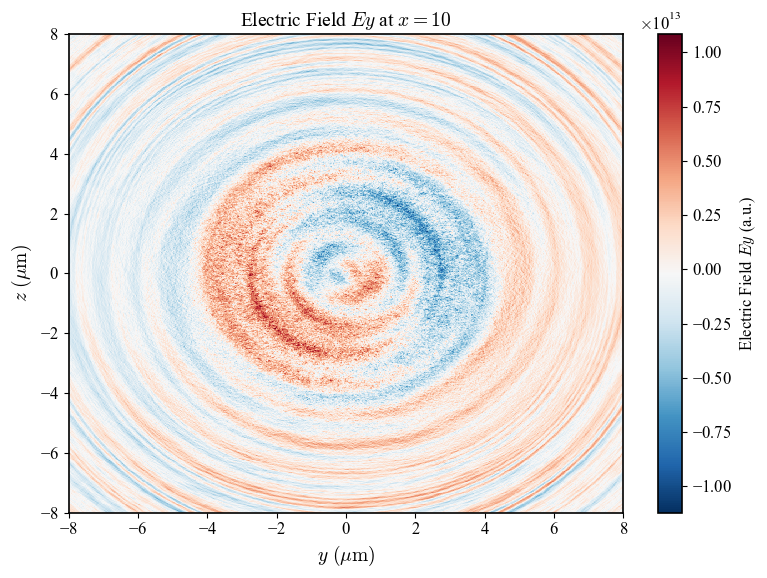

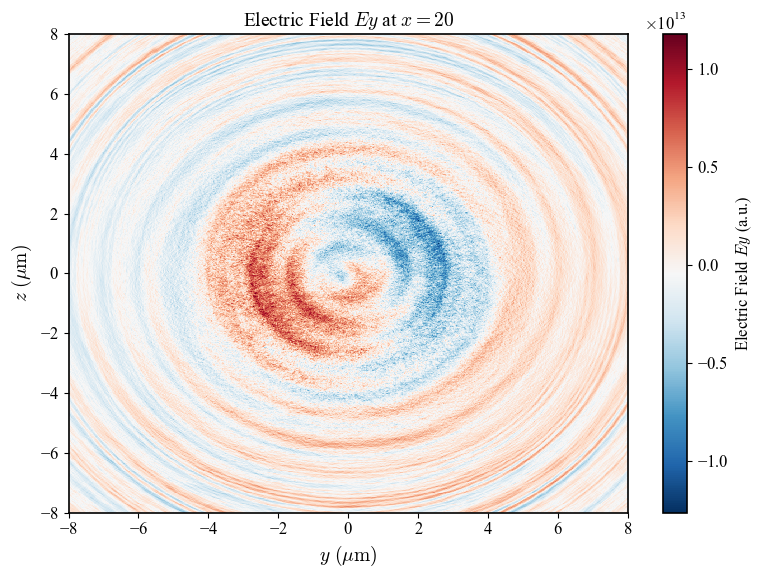

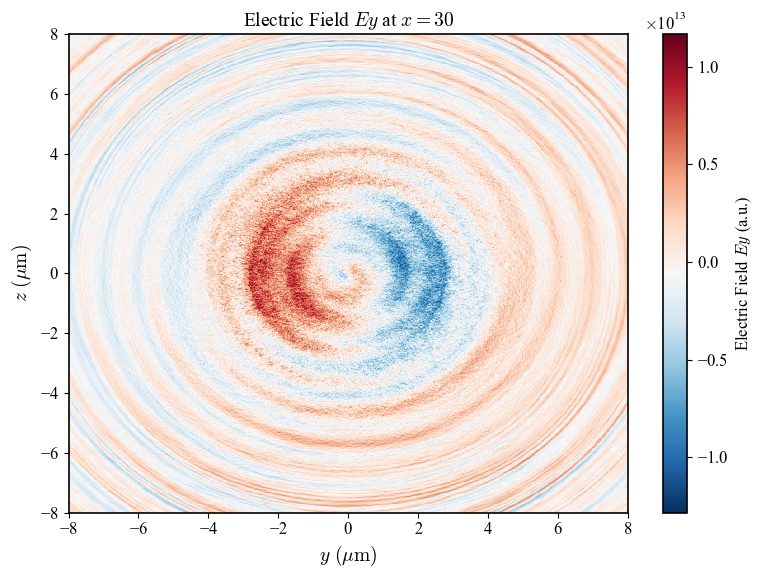

In [3]:
# y-z面图
# ----------- 绘图函数 -------------
def plot_yz_plane(field_data, x_index, y_vals, z_vals, y_slice, z_slice, field_label='Ey'):
    """绘制指定 x 截面的 y-z 面电场分布图"""
    field_slice = field_data[x_index, y_slice, z_slice]
    Y, Z = np.meshgrid(y_vals, z_vals, indexing='ij')

    fig, ax = plt.subplots(figsize=(8, 6))
    c = ax.pcolormesh(Y, Z, field_slice, shading='auto', cmap='RdBu_r')

    cbar = plt.colorbar(c, ax=ax)
    cbar.set_label(f'Electric Field ${field_label}$ (a.u.)', fontsize=12)
    cbar.formatter = ticker.ScalarFormatter(useMathText=True)
    cbar.update_ticks()

    ax.set_xlabel(r'$y\ (\mu\mathrm{m})$', fontsize=14)
    ax.set_ylabel(r'$z\ (\mu\mathrm{m})$', fontsize=14)
    ax.set_title(f'Electric Field ${field_label}$ at $x = {x_index}$', fontsize=14)

    # 自动刻度优化
    ax.xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
    ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
    ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins='auto'))
    ax.yaxis.set_major_locator(ticker.MaxNLocator(nbins='auto'))

    plt.tight_layout()
    plt.show()

# ----------- 设置切片范围 -------------
y_slice = slice(0, 1000)
z_slice = slice(0, 1000)
y_values = y[y_slice]
z_values = z[z_slice]

# ----------- 设置需要绘图的 x 截面索引 -------------
# x_indices = [1000, 1010, 1020]
x_indices = [10, 20, 30]


# 可选：选择要绘制的电场分量
field_component = 'Ey'  # 可选 'Ex', 'Ey', 'Ez'
Field = field_dict[field_component]


# ----------- 批量绘图 -------------
for xi in x_indices:
    plot_yz_plane(Field, xi, y_values, z_values, y_slice, z_slice, field_label=field_component)


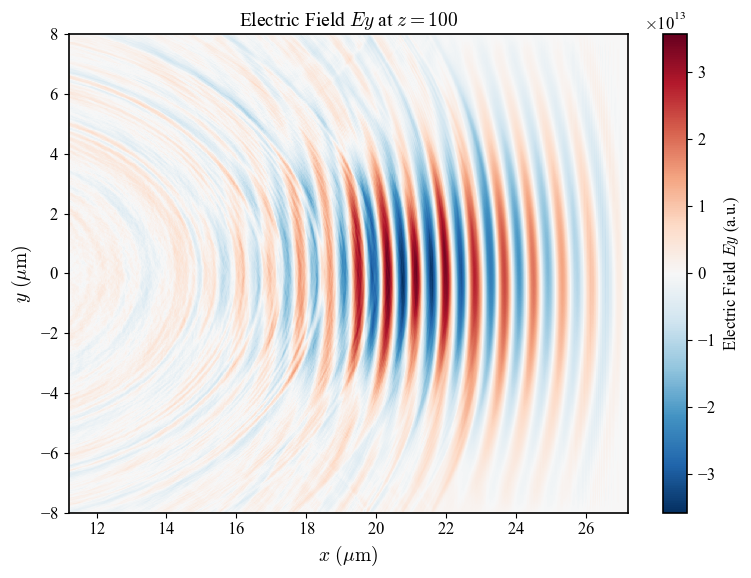

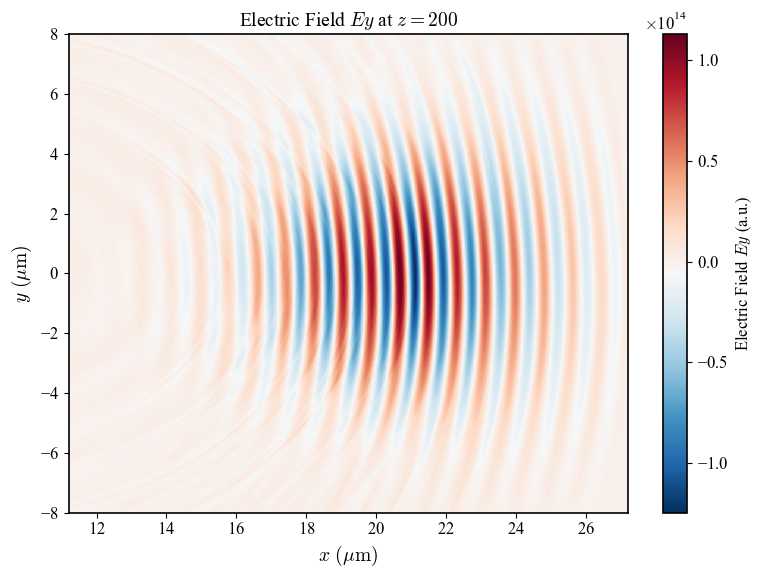

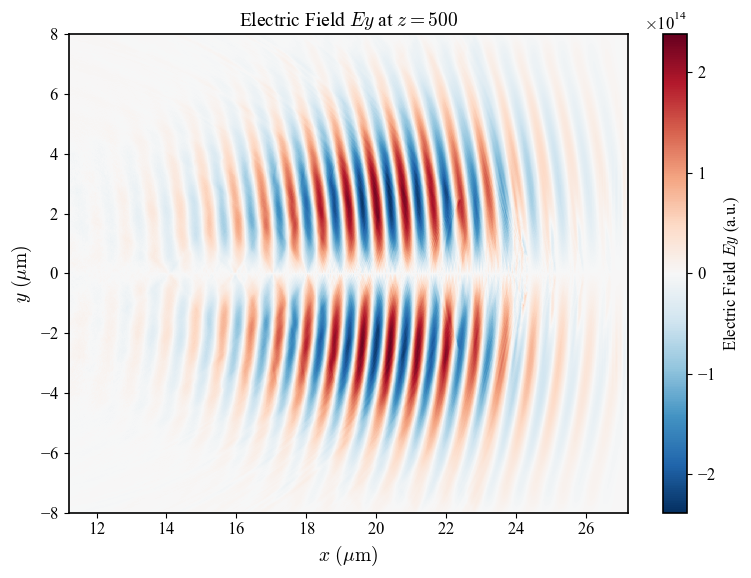

In [5]:
def plot_xy_plane(field_data, z_index, x_vals, y_vals, x_slice, y_slice, field_label='Ey'):
    """绘制指定 z 截面的 x-y 面电场分布图"""
    # 取对应 z 层的二维数据
    field_slice = field_data[x_slice, y_slice, z_index]
    X, Y = np.meshgrid(x_vals, y_vals, indexing='ij')

    fig, ax = plt.subplots(figsize=(8, 6))
    c = ax.pcolormesh(X, Y, field_slice, shading='auto', cmap='RdBu_r')

    cbar = plt.colorbar(c, ax=ax)
    cbar.set_label(f'Electric Field ${field_label}$ (a.u.)', fontsize=12)
    cbar.formatter = ticker.ScalarFormatter(useMathText=True)
    cbar.update_ticks()

    ax.set_xlabel(r'$x\ (\mu\mathrm{m})$', fontsize=14)
    ax.set_ylabel(r'$y\ (\mu\mathrm{m})$', fontsize=14)
    ax.set_title(f'Electric Field ${field_label}$ at $z = {z_index}$', fontsize=14)

    ax.xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
    ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
    ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins='auto'))
    ax.yaxis.set_major_locator(ticker.MaxNLocator(nbins='auto'))

    plt.tight_layout()
    plt.show()

# --------- 设置切片范围 ---------
x_slice = slice(0, 1500)
y_slice = slice(0, 1500)
x_values = x[x_slice]
y_values = y[y_slice]

# --------- 指定几个不同的 z 截面索引 ---------
z_indices = [100, 200, 500]


# 可选：选择要绘制的电场分量
field_component = 'Ey'  # 可选 'Ex', 'Ey', 'Ez'
Field = field_dict[field_component]

# --------- 批量绘制 ---------
for zi in z_indices:
    plot_xy_plane(Field, zi, x_values, y_values, x_slice, y_slice, field_label=field_component)


In [ ]:
### 随时间演化

def plot_xy_plane(field_data, z_index, x_vals, y_vals, x_slice, y_slice, field_label='Ey', time_fs=None):
    """绘制指定 z 截面的 x-y 面电场分布图，支持时间显示"""
    field_slice = field_data[x_slice, y_slice, z_index]
    X, Y = np.meshgrid(x_vals, y_vals, indexing='ij')

    fig, ax = plt.subplots(figsize=(8, 6))
    c = ax.pcolormesh(X, Y, field_slice, shading='auto', cmap='RdBu_r')

    cbar = plt.colorbar(c, ax=ax)
    cbar.set_label(f'Electric Field ${field_label}$ (a.u.)', fontsize=12)
    cbar.formatter = ticker.ScalarFormatter(useMathText=True)
    cbar.update_ticks()

    ax.set_xlabel(r'$x\ (\mu\mathrm{m})$', fontsize=14)
    ax.set_ylabel(r'$y\ (\mu\mathrm{m})$', fontsize=14)

    if time_fs is not None:
        ax.set_title(f'$E_{{{field_label[-1]}}}$ at $z = {z_index}$, $t = {time_fs:.1f}\ \mathrm{{fs}}$', fontsize=14)
    else:
        ax.set_title(f'Electric Field ${field_label}$ at $z = {z_index}$', fontsize=14)

    ax.xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
    ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
    ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins='auto'))
    ax.yaxis.set_major_locator(ticker.MaxNLocator(nbins='auto'))

    plt.tight_layout()
    plt.show()

In [ ]:
T0_fs = 3.3  # 每步对应时间（单位：fs）
file_indices = [0, 2, 4, 6]  # 时间步序号，越大表示时间越后
z_index = 200  # 固定 z 截面

# 设置切片范围
x_slice = slice(0, 500)
y_slice = slice(0, 500)

# 获取静态坐标（只读取一次）
grid = sh.getdata(os.path.join(base_path, f"{file_prefix}{file_indices[0]:04d}{file_suffix}")).Grid_Grid_mid.data
x_values = grid[0][x_slice] / 1e-6
y_values = grid[1][y_slice] / 1e-6

# 选择电场分量
field_component = 'Ey'  # 可改为 'Ex', 'Ez'

# 循环读取不同时间文件并绘图
for idx in file_indices:
    file_name = f"{file_prefix}{idx:04d}{file_suffix}"
    file_path = os.path.join(base_path, file_name)
    
    Field_Data = sh.getdata(file_path)
    field_dict = {
        'Ex': Field_Data.Electric_Field_Ex.data,
        'Ey': Field_Data.Electric_Field_Ey.data,
        'Ez': Field_Data.Electric_Field_Ez.data
    }
    Field = field_dict[field_component]
    
    time_fs = idx * T0_fs
    plot_xy_plane(Field, z_index, x_values, y_values, x_slice, y_slice, field_label=field_component, time_fs=time_fs)
